#### PROBLEM STATEMENT:

The problem is that the Bank Marketing campaigns of a Portuguese banking institution need to identify the factors that cause the customers to tend to take the subscription, as well as Bank Marketing campaigns of a Portuguese banking institution need to identify the reasons behind the customer which make them not take the subscription.

##### Aim:

You aim to Determinate/Analysis factors for the subscription and nonsubscription. Using the ITP and NPV techniques find the below questions.


##### DATASET DESCRIPTION:

Bank Marketing: The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to assess if the product (bank term deposit) would be (or not) subscribed.

QUESTIONS TO SOLVE:

Check Point 1:

1. Import data set


In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data set
bank_data = pd.read_csv("./bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


2. Make the data proper to make use of data for analysis

- Identify the Features data types before entering into the analysis
- Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.
- Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.
-  Find duplicates (if necessary)

In [5]:
# Shape of the Data set
print("shape:",bank_data.shape)

# Look into the Data Types of the data Set
print("Data Columns Info:")
bank_data.info()

shape: (4521, 17)
Data Columns Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# Find Missing values in the Data Set
print("missing values: \n",bank_data.isnull().sum())

missing values: 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Understandings of the DataFrame
* From the Previous Cell Out put and the Nature of the Data set we can come to a conclusion that we do not have any missing values in the Data set. though we have unknown values in some of the columns, they expected values so they can be considered as valid values.
* We have following columns **'default','housing','loan' and 'y'** having values either yes or no and this can be converted to boolean data type.
* and will convert the **balance** column to floating point.

In [7]:
# function to convert columns to boolean
def convert_to_boolean(column):
    bank_data[column] = bank_data[column].replace('yes', True)
    bank_data[column] = bank_data[column].replace('no', False)
    bank_data[column] = bank_data[column].astype('bool')

columns_to_convert = ['default', 'housing', 'loan', 'y']

for col in columns_to_convert:
    convert_to_boolean(col)

#convert the balance column to float data type.
bank_data.balance = bank_data.balance.astype('float64')

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,False,1787.0,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,False,4789.0,True,True,cellular,11,may,220,1,339,4,failure,False
2,35,management,single,tertiary,False,1350.0,True,False,cellular,16,apr,185,1,330,1,failure,False
3,30,management,married,tertiary,False,1476.0,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,False,0.0,True,False,unknown,5,may,226,1,-1,0,unknown,False


In [8]:
# Find the Duplicated records
bank_data.duplicated().sum() # we don't have any duplicated records in the data set.

0

In [9]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### Check Point 2

PERFORM DATA ANALYSIS

1. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

In [10]:
bank_data.groupby('y')['balance'].aggregate('mean')

y
False    1403.211750
True     1571.955854
Name: balance, dtype: float64

Text(0.5, 1.0, 'Avg Bal Vs Subscription')

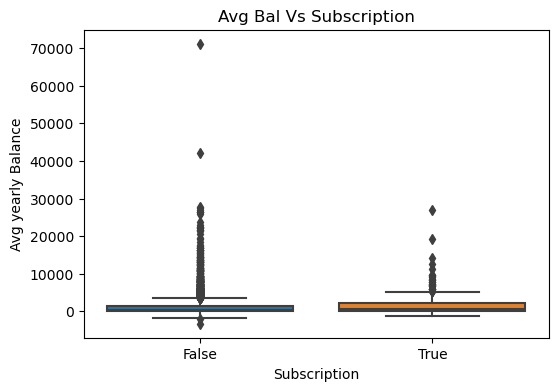

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(bank_data, x='y', y='balance')
plt.xlabel("Subscription")
plt.ylabel("Avg yearly Balance")
plt.title('Avg Bal Vs Subscription')

Observations -->

By Looking at the Above the Box Chart the Data set have couple of values which may fall under out of the box, those values or records needs to be avoided to achive good results with current data set. because most of the customers avg balance lies under 10k euro's

2. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

Text(0.5, 1.0, 'Distribution of Customers over the Education')

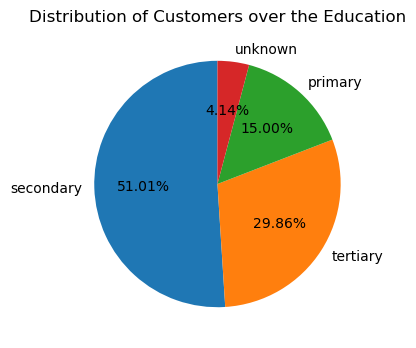

In [12]:
data = bank_data.education.value_counts()
plt.figure(figsize=(4,4))
plt.pie(x=data.values, labels=data.index, autopct='%.2f%%', startangle=90)
plt.title("Distribution of Customers over the Education")

3. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [13]:
def season(month):
  if month in ['dec', 'jan', 'feb']:
    return 'Winter'
  elif month in ['mar', 'apr', 'may']:
    return 'Summer'
  elif month in ['jun', 'jul', 'aug']:
    return 'Rainy'
  else:
    return 'Monsoon'

bank_data['season'] = [season(month) for month in bank_data['month']]
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,False,1787.0,False,False,cellular,19,oct,79,1,-1,0,unknown,False,Monsoon
1,33,services,married,secondary,False,4789.0,True,True,cellular,11,may,220,1,339,4,failure,False,Summer
2,35,management,single,tertiary,False,1350.0,True,False,cellular,16,apr,185,1,330,1,failure,False,Summer
3,30,management,married,tertiary,False,1476.0,True,True,unknown,3,jun,199,4,-1,0,unknown,False,Rainy
4,59,blue-collar,married,secondary,False,0.0,True,False,unknown,5,may,226,1,-1,0,unknown,False,Summer


4. Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

Text(0, 0.5, 'Frequency of Customers')

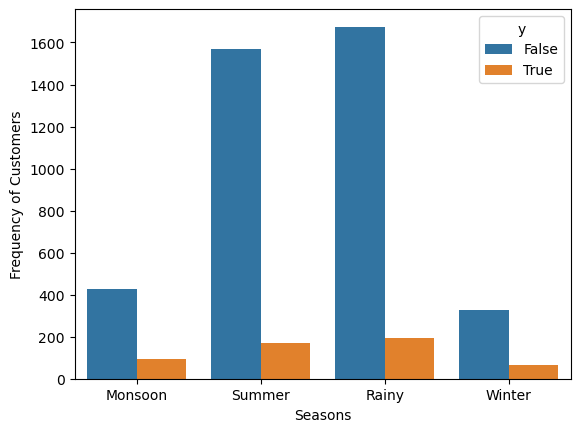

In [14]:
sns.countplot(bank_data, x='season', hue='y')
plt.xlabel("Seasons")
plt.ylabel('Frequency of Customers')

5. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

Text(0, 0.5, 'No of days from last contact')

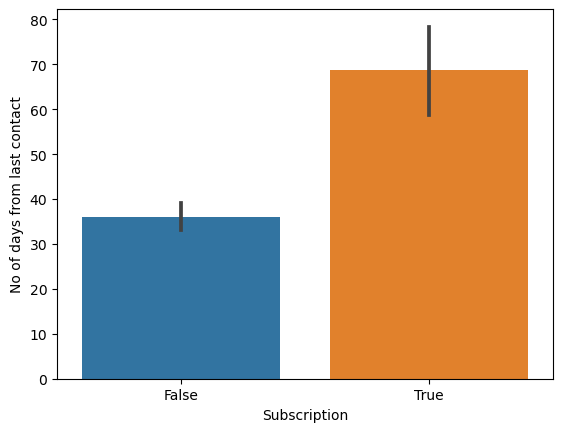

In [15]:
sns.barplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

Text(0, 0.5, 'No of days from last contact')

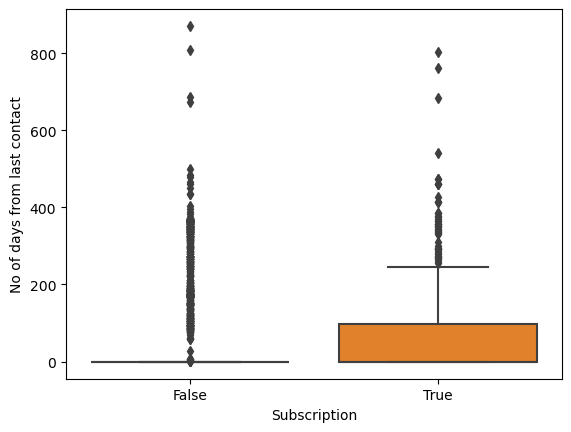

In [16]:
sns.boxplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

In [17]:
bank_data[bank_data.y == False].pdays.describe()

count    4000.000000
mean       36.006000
std        96.297657
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

Observations -->
By looking into the Box Plot of Previous contact days and Subscription, and the description of previous cell, there is huge effect on Subscription with last contacted days. like The cutomers with -1 values on the  P-Days column and it has impacted much on Subscription due to non contact / too many calls made to customer to cancel their subscription

In [18]:
# 6. Replace the -1 as nan values for the P-days store.
bank_data.pdays.replace(-1, np.nan, inplace=True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,False,1787.0,False,False,cellular,19,oct,79,1,NaN,0,unknown,False,Monsoon
1,33,services,married,secondary,False,4789.0,True,True,cellular,11,may,220,1,339.0,4,failure,False,Summer
2,35,management,single,tertiary,False,1350.0,True,False,cellular,16,apr,185,1,330.0,1,failure,False,Summer
3,30,management,married,tertiary,False,1476.0,True,True,unknown,3,jun,199,4,NaN,0,unknown,False,Rainy
4,59,blue-collar,married,secondary,False,0.0,True,False,unknown,5,may,226,1,NaN,0,unknown,False,Summer


7. Once you are done with question number 6, do the same analysis as question number 5. And observe the difference between question number 5 and question number 7.


Text(0, 0.5, 'No of days from last contact')

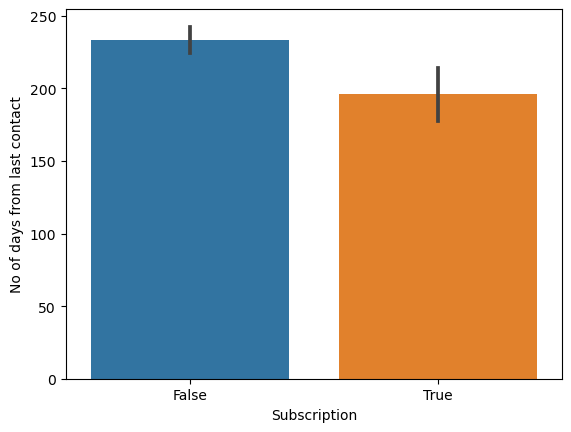

In [19]:
sns.barplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

Observations -->
Post modifying the data set with -1 to NaN, Distribution plots indicate that the due to non connectivity with the customer compared to subscribed customers they were not subscribed to Term Deposit. even the same thing indicates in the box plot in below.

Text(0, 0.5, 'No of days from last contact')

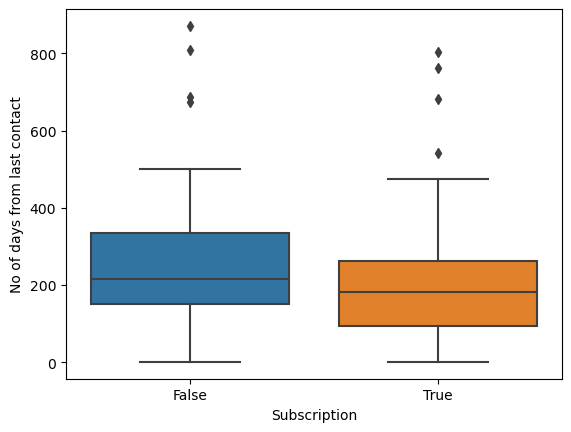

In [20]:
sns.boxplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

8. Does the customer take the term subscription who has less than 0 balance?

Text(0.5, 1.0, 'Negative balance VS Subscription')

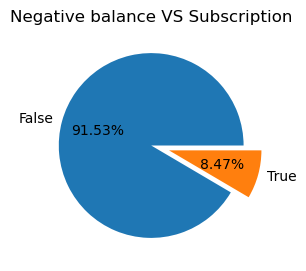

In [21]:
data = bank_data[bank_data.balance < 0]['y'].value_counts()
data

plt.figure(figsize=(3,3))
plt.pie(x=data.values, labels=data.index, autopct='%.2f%%', explode=[0, 0.2])
plt.title("Negative balance VS Subscription")

Observations -->

Does the customer take the term subscription who has less than 0 balance?  No. but we have few customers in a margin of **8.5** percent customers who have subscribed to the Term Deposit this can be considered outlier values. because majority of the Customers have not taken the Subscription who have negative balance on their yearly Avg balanace.

In [22]:
# 9. Use Pivot table to find the maximum balance for each type of job.
bank_data.pivot_table(index='job', values=['balance'], aggfunc='max')

,balance
job,
admin.,22171.0
blue-collar,16353.0
entrepreneur,42045.0
housemaid,26965.0
management,27359.0
retired,71188.0
self-employed,16430.0
services,26394.0
student,11555.0


10. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

Text(0, 0.5, 'Avg Yearly Balance')

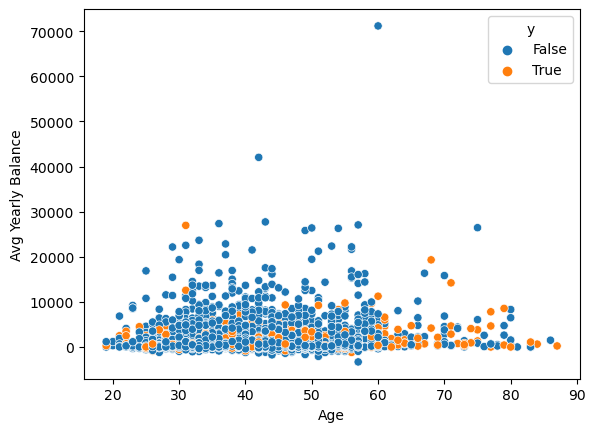

In [23]:
sns.scatterplot(bank_data, x='age', y='balance', hue='y')
plt.xlabel('Age')
plt.ylabel('Avg Yearly Balance')


Observations -->

Most of the customers have balance less than 10000 Euros. And the people who have subscribed and not subscribed are almost equal. Most of the customers are in age group 28 to 68. Most of the elderly people have subscribed into the plan.
From the above chart, that defines like the age group above **60** are Subscribed more, compared to ages under **60**.

13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

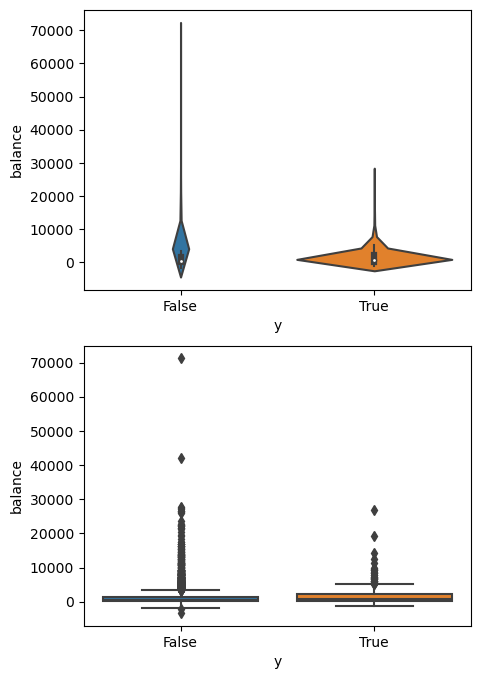

In [24]:
fig, axes = plt.subplots(2,figsize=(5, 8))

sns.violinplot(ax=axes[0], data=bank_data, x='y',y='balance',gridsize=10)
sns.boxplot(ax=axes[1], data=bank_data, x='y',y='balance')
plt.show()

The Box plots are used to visualize the Distribution of the DataFrame, in norms of mean, Quartiles and potentials Outliers on the group of selected data.
and the Violin Plots Visualizes the Shape of the Distrubution like at what poits the data set is distributed.
Observations -->

* Violin plots and box plots offer different perspectives on the data distribution. Violin plots provide a more detailed view of the distribution.

* Box plots offer a more concise summary of the distribution.

* Using both dolin plots and box plots together can provide a comprehensive understanding of the distribution,




14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.

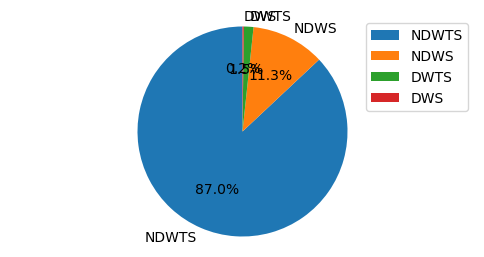

In [25]:
plt.figure(figsize=(6,3))
data = bank_data.groupby('default')['y'].value_counts()
plt.pie(data,autopct='%1.1f%%', startangle=90, labels=['NDWTS', 'NDWS', 'DWTS', 'DWS'])
plt.axis('equal')
plt.legend()
plt.show()

15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='pdays'>

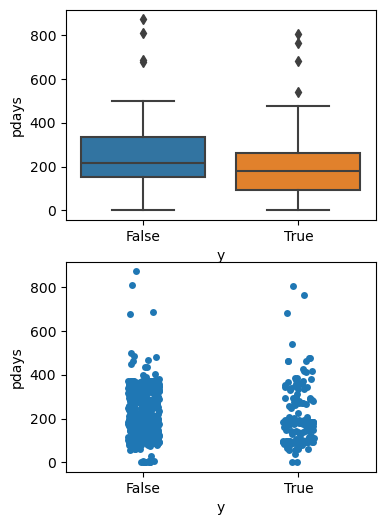

In [26]:
fig, axes = plt.subplots(2,figsize=(4, 6))
data_set=bank_data.dropna()

sns.boxplot(ax=axes[0], data=data_set, x='y',y='pdays')
sns.stripplot(ax=axes[1], data=data_set, x='y',y='pdays')

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='pdays'>

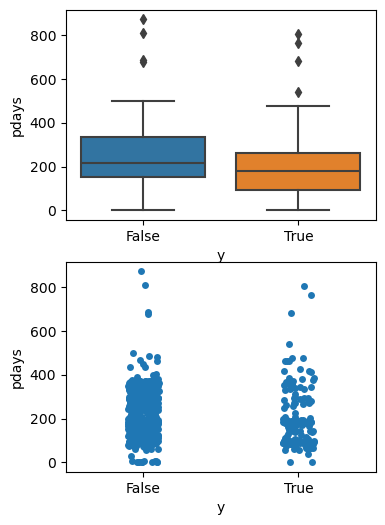

In [29]:
fig, axes = plt.subplots(2,figsize=(4, 6))
data_set=bank_data

sns.boxplot(ax=axes[0], data=data_set, x='y',y='pdays')
sns.stripplot(ax=axes[1], data=data_set, x='y',y='pdays')

<Axes: xlabel='job', ylabel='count'>

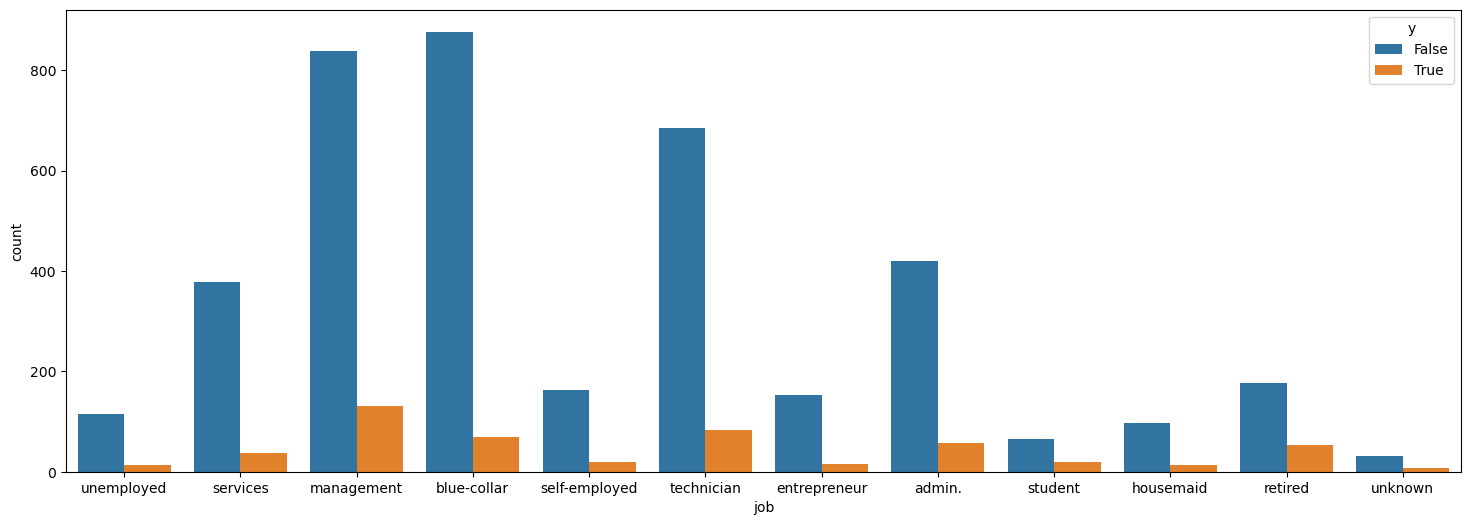

In [32]:
plt.figure(figsize=(18, 6))
sns.countplot(x='job', hue='housing', data=bank_data)

<Axes: xlabel='job', ylabel='count'>

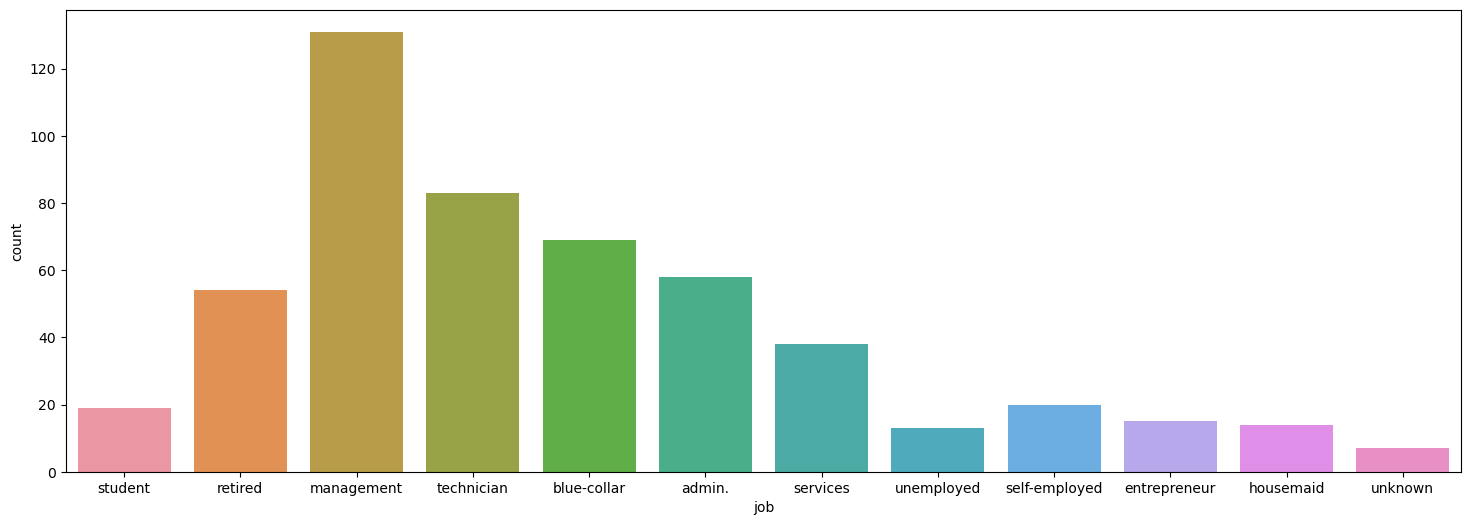

In [33]:
plt.figure(figsize=(18, 6))
sns.countplot(x='job', data=bank_data[bank_data.y])